<a href="https://colab.research.google.com/github/tmradjuah/EstelSpeak/blob/master/regresi_linier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

print("Library berhasil diimpor!")

Library berhasil diimpor!


In [12]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat (2).csv


In [5]:
data = pd.read_csv("student-mat.csv", sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
print("Jumlah baris dan kolom:", data.shape)
print("\nTipe data tiap kolom:\n", data.dtypes)
print("\nCek data kosong:\n", data.isnull().sum())

Jumlah baris dan kolom: (395, 33)

Tipe data tiap kolom:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Cek data kosong:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytim

In [15]:
features = ["G1", "G2", "studytime", "failures", "absences"]
target = "G3"

X = data[features]
y = data[target]

print("Fitur yang digunakan:", features)
print("Label yang diprediksi:", target)

Fitur yang digunakan: ['G1', 'G2', 'studytime', 'failures', 'absences']
Label yang diprediksi: G3


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 316
Jumlah data testing: 79


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model berhasil dilatih!")
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)

Model berhasil dilatih!
Koefisien: [ 0.14446336  0.97961532 -0.07123057 -0.45581289  0.0392449 ]
Intercept: -1.621312403519088


In [18]:
y_pred = model.predict(X_test)

result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}).reset_index(drop=True)

result.head(10)

,Actual,Predicted
0,10,6.011138
1,12,12.203063
2,5,3.425839
3,10,8.522430
4,9,7.873003
5,13,12.704786
6,18,18.692596
7,6,7.100112
8,0,7.228856
9,14,12.638812


In [21]:
# =============================================================
# 🔹 Menghitung MSE dan R²
# =============================================================
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# =============================================================
# 🔹 Membuat fungsi-fungsi evaluasi tambahan
# =============================================================

# MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# RMSE (Root Mean Squared Error)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAE (Mean Absolute Error)
def mean_absolute_error_custom(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# =============================================================
# 🔹 Menghitung semua metrik
# =============================================================
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error_custom(y_test, y_pred)

# =============================================================
# 🔹 Menampilkan hasil evaluasi
# =============================================================
print("HASIL EVALUASI MODEL REGRESI LINIER")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

HASIL EVALUASI MODEL REGRESI LINIER
Mean Squared Error (MSE): 4.4665
Root Mean Squared Error (RMSE): 2.1134
Mean Absolute Error (MAE): 1.3394
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R²): 0.7822


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


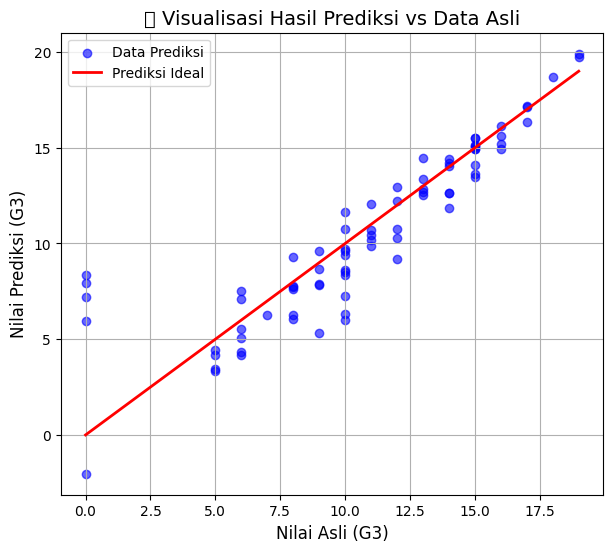

In [22]:

# =============================================================
# Scatter plot antara nilai asli (y_test) dan prediksi (y_pred)
# =============================================================

plt.figure(figsize=(7,6))

# Titik biru = data asli (actual vs predicted)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Data Prediksi')

# Garis merah = garis ideal (prediksi sempurna)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Prediksi Ideal')

plt.title('📊 Visualisasi Hasil Prediksi vs Data Asli', fontsize=14)
plt.xlabel('Nilai Asli (G3)', fontsize=12)
plt.ylabel('Nilai Prediksi (G3)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


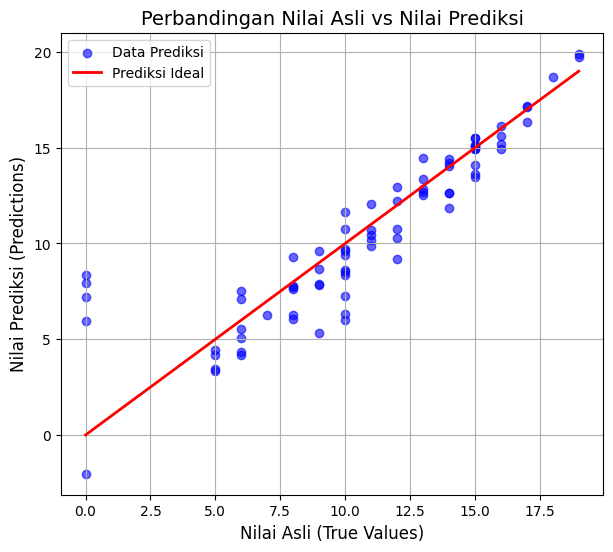

In [23]:
# =============================================================
# Visualisasi hasil prediksi vs data asli
# =============================================================

plt.figure(figsize=(7,6))

# Titik-titik biru: menunjukkan hubungan antara nilai aktual dan prediksi
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Data Prediksi')

# Garis merah diagonal: menunjukkan prediksi sempurna (y_pred = y_true)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color='red',
    linewidth=2,
    label='Prediksi Ideal'
)

# Label sumbu dan judul
plt.xlabel('Nilai Asli (True Values)', fontsize=12)
plt.ylabel('Nilai Prediksi (Predictions)', fontsize=12)
plt.title('Perbandingan Nilai Asli vs Nilai Prediksi', fontsize=14)

# Menampilkan legenda dan grid agar lebih rapi
plt.legend()
plt.grid(True)
plt.show()
